### Bias & Fairness in Data: Distribution Check
**Description**: Load the Adult Income dataset and check for representation bias by analyzing the distribution of gender across different income levels.

Gender counts by income level:
sex            Female   Male
income_binary               
0               14423  22732
1                1769   9918

Gender percentages by income level:
sex               Female       Male
income_binary                      
0              38.818463  61.181537
1              15.136476  84.863524


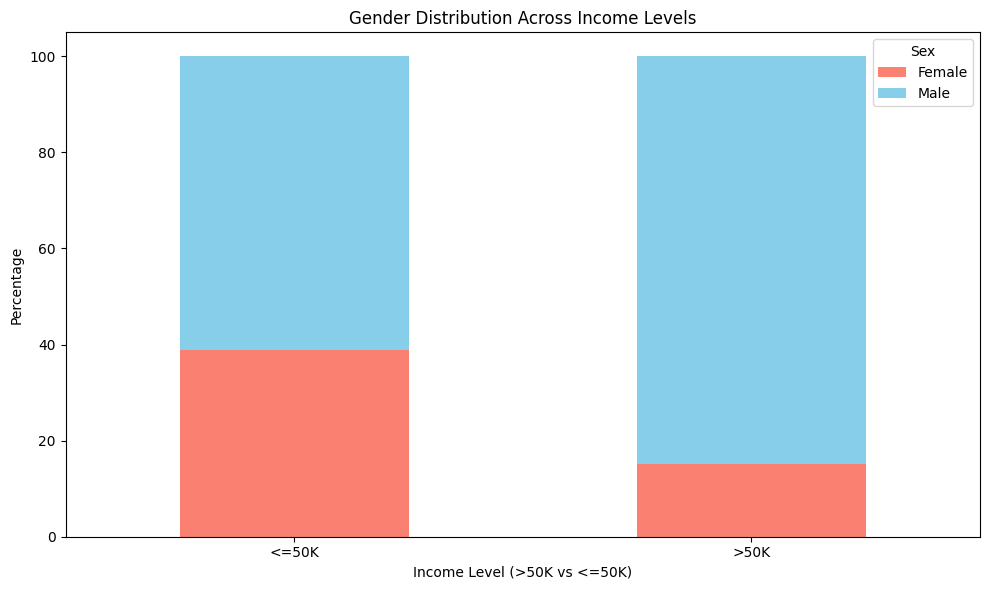

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import unittest

def load_adult_income_dataset(url, columns):
    """
    Load the Adult Income dataset from the given URL with error handling.
    """
    try:
        # Load CSV, skip bad lines (deprecated param replaced with on_bad_lines in recent pandas)
        df = pd.read_csv(url, header=None, names=columns, on_bad_lines='skip')
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

def preprocess_data(df):
    """
    Convert income to binary and check for missing or invalid values.
    """
    if df is None:
        raise ValueError("Input DataFrame is None")

    # Basic validation
    if 'income' not in df.columns or 'sex' not in df.columns:
        raise ValueError("Required columns 'income' and 'sex' not found")

    # Drop rows with missing income or sex
    df = df.dropna(subset=['income', 'sex'])

    # Convert income to binary
    df['income_binary'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

    return df

def calculate_gender_distribution(df):
    """
    Calculate gender counts and percentages per income level.
    """
    gender_income_dist = df.groupby(['income_binary', 'sex']).size().unstack(fill_value=0)
    gender_income_percent = gender_income_dist.div(gender_income_dist.sum(axis=1), axis=0) * 100
    return gender_income_dist, gender_income_percent

def plot_gender_distribution(gender_income_percent):
    """
    Plot stacked bar chart of gender distribution across income levels.
    """
    gender_income_percent.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'skyblue'])
    plt.title('Gender Distribution Across Income Levels')
    plt.xlabel('Income Level (>50K vs <=50K)')
    plt.ylabel('Percentage')
    plt.xticks([0, 1], ['<=50K', '>50K'], rotation=0)
    plt.legend(title='Sex')
    plt.tight_layout()
    plt.show()

# Constants
URL = "https://raw.githubusercontent.com/fenago/datasets/refs/heads/main/adult-all.csv"
COLUMNS = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

def main():
    df = load_adult_income_dataset(URL, COLUMNS)
    if df is None:
        print("Dataset could not be loaded. Exiting.")
        return

    try:
        df = preprocess_data(df)
    except ValueError as e:
        print(f"Preprocessing error: {e}")
        return

    gender_counts, gender_percent = calculate_gender_distribution(df)
    print("Gender counts by income level:")
    print(gender_counts)
    print("\nGender percentages by income level:")
    print(gender_percent)

    plot_gender_distribution(gender_percent)

if __name__ == "__main__":
    main()


# Simple unit test for data processing function
class TestAdultIncomeProcessing(unittest.TestCase):
    def test_preprocess_data(self):
        sample_data = {
            'income': ['>50K', '<=50K', '>50K', '<=50K'],
            'sex': ['Male', 'Female', 'Female', 'Male']
        }
        df_sample = pd.DataFrame(sample_data)
        processed_df = preprocess_data(df_sample)
        expected_income_binary = [1, 0, 1, 0]
        self.assertListEqual(processed_df['income_binary'].tolist(), expected_income_binary)

    def test_invalid_df(self):
        with self.assertRaises(ValueError):
            preprocess_data(None)

        with self.assertRaises(ValueError):
            preprocess_data(pd.DataFrame({'wrong_col': []}))

